In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_file = "/content/drive/My Drive/Colab Notebooks/digitrecognizer.zip"

In [0]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall("/digit-recognizer")

In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow as tf
import pandas as pd
import numpy as np
train_data = pd.read_csv("/digit-recognizer/train.csv")
test_data = pd.read_csv("/digit-recognizer/test.csv")
train_data.head()

Using TensorFlow backend.


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


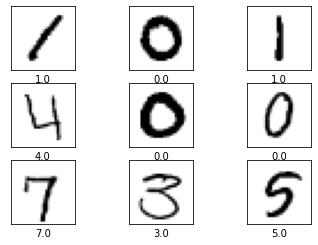

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
X = np.array(train_data.drop("label", axis=1)).astype('float32')
y = np.array(train_data['label']).astype('float32')
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

X = X / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_test = np.array(test_data).astype('float32')
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
plt.figure(figsize=(10,10))

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [0]:
#increse to epochs to 30 for better accuracy
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history = model.fit(X_train, y_train, epochs=5, batch_size=85, validation_data=(X_val, y_val))



Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 244s 7ms/step - loss: 0.2799 - accuracy: 0.9124 - precision: 0.8960 - recall: 0.7387 - val_loss: 0.0608 - val_accuracy: 0.9799 - val_precision: 0.9540 - val_recall: 0.8996
Epoch 2/5
33600/33600 [==============================] - 253s 8ms/step - loss: 0.0829 - accuracy: 0.9747 - precision: 0.9630 - recall: 0.9245 - val_loss: 0.0487 - val_accuracy: 0.9846 - val_precision: 0.9679 - val_recall: 0.9385
Epoch 3/5
33600/33600 [==============================] - 244s 7ms/step - loss: 0.0601 - accuracy: 0.9815 - precision: 0.9714 - recall: 0.9470 - val_loss: 0.0421 - val_accuracy: 0.9869 - val_precision: 0.9737 - val_recall: 0.9528
Epoch 4/5
33600/33600 [==============================] - 239s 7ms/step - loss: 0.0478 - accuracy: 0.9857 - precision: 0.9757 - recall: 0.9573 - val_loss: 0.0426 - val_accuracy: 0.9870 - val_precision: 0.9772 - val_recall: 0.9609
Epoch 5/5
33600/33600 [============

In [0]:
print( history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'loss', 'accuracy', 'precision', 'recall'])


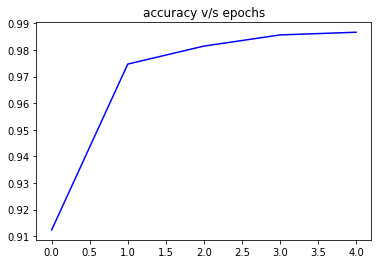

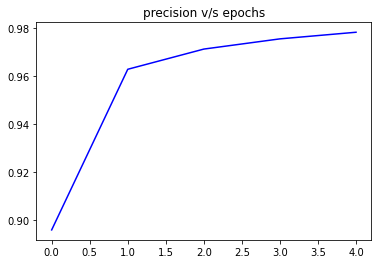

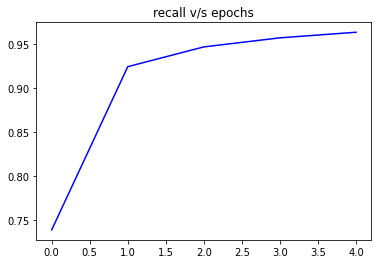

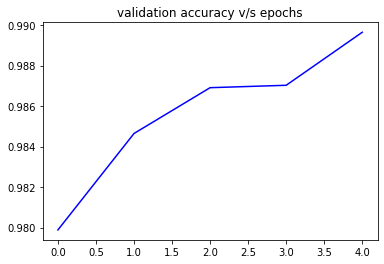

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
pre = history.history['precision']
rec = history.history['recall']
epochs = range(len(accuracy))
plt.title("accuracy v/s epochs")
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.show()
plt.title("precision v/s epochs")
plt.plot(epochs, pre, 'b', label='Training precision')
plt.show()
plt.title("recall v/s epochs")
plt.plot(epochs, rec, 'b', label='Training recall')
plt.show()
plt.title("validation accuracy v/s epochs")
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.show()



In [0]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
test_scores = model.evaluate(X_val, y_val)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
#print('\n# Generate predictions for 1 sample')

#predictions = model.predict(X_test[:1])
#plt.imshow(X_test[:1].reshape(28, 28), cmap=plt.cm.binary)
#print('predictions shape:', predictions)
#print('predictions shape:', np.argmax(predictions))


# Evaluate on validation data
8400/8400 [==============================] - 14s 2ms/step
Test loss: 0.034736165535203846
Test accuracy: 0.989642858505249


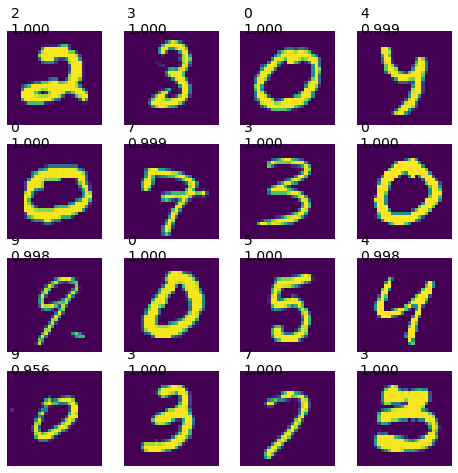

In [0]:
from matplotlib import pyplot
%matplotlib inline
LABEL_NAMES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(X_test[:16]), 
                 model.predict(X_test[:16]))